# Linear Regression Model and Optimization



**Objective:** To predict residential property prices (SalePrice) using three different approaches: Scikit-Learn, manual Gradient Descent, and Ordinary Least Squares (OLS).

## Part 1: Data Preparation and Exploration

## Data Loading and Splitting

In [34]:
import pandas as pd
import numpy as np


In [20]:
df = pd.read_csv("AmesHousing.txt", delimiter="\t")
df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [21]:
# Select the first 1460 rows for training and the rest for testing
train= df.iloc[:1460,:]
test = df.iloc[1460:, :]

In [22]:
print("========== Train ===========")
print(train.info())

print("========== Test ===========")
print(test.info())

========== Train ===========
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            1460 non-null   int64  
 1   PID              1460 non-null   int64  
 2   MS SubClass      1460 non-null   int64  
 3   MS Zoning        1460 non-null   object 
 4   Lot Frontage     1211 non-null   float64
 5   Lot Area         1460 non-null   int64  
 6   Street           1460 non-null   object 
 7   Alley            109 non-null    object 
 8   Lot Shape        1460 non-null   object 
 9   Land Contour     1460 non-null   object 
 10  Utilities        1460 non-null   object 
 11  Lot Config       1460 non-null   object 
 12  Land Slope       1460 non-null   object 
 13  Neighborhood     1460 non-null   object 
 14  Condition 1      1460 non-null   object 
 15  Condition 2      1460 non-null   object 
 16  Bldg Type        1460 non-null 

In [23]:
print(train.columns)

Index(['Order', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
      

"Here, we want to predict the real estate prices in the city of Ames. So we are focusing on the `SalePrice` column.

In [24]:
target = "SalePrice"

## Data Visualization (Exploratory Data Analysis)

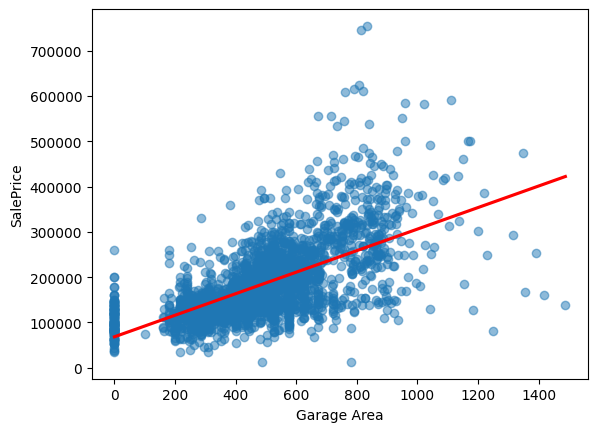

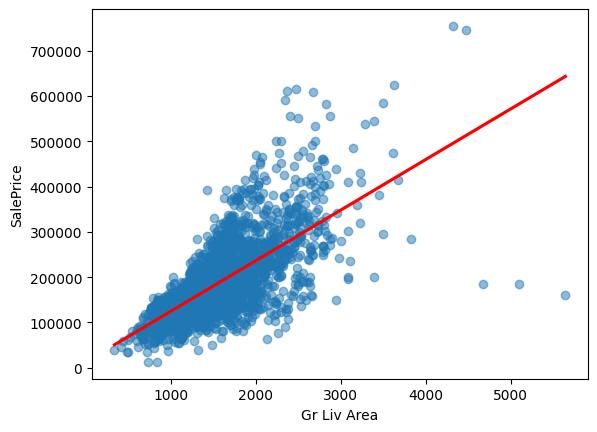

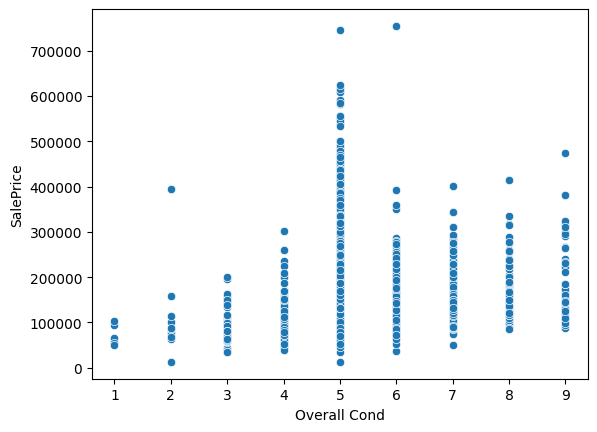

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# train.plot(x='Garage Area', y='SalePrice', ax=ax1, kind='scatter')

sns.regplot(data=df, x="Garage Area", y=target, line_kws=dict(color="r"), ci=None, scatter_kws={"alpha":0.5})
plt.show()
sns.regplot(data=df, x="Gr Liv Area", y=target, line_kws=dict(color="r"), ci=None, scatter_kws={"alpha":0.5})
plt.show()
sns.scatterplot(data=df, x="Overall Cond", y=target)
plt.show()

`Gr Liv Area` appears to be more strongly correlated with `SalePrice`.


## Part 2: Linear Regression with Scikit-Learn

### Simple Linear Regression

We will use Scikit-learn to fit a simple linear regression model to predict `SalePrice` based on selected features.


In [26]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
feature = "Gr Liv Area"
lr.fit(train[[feature]], train[[target]])

a1, a0= lr.coef_, lr.intercept_
print("Coef:", a1, "\nIntercept:",a0)


Coef: [[116.86624683]] 
Intercept: [5366.82171006]


In [27]:
from sklearn.metrics import root_mean_squared_error

y_test_pred = lr.predict(test[[feature]])
y_train_pred = lr.predict(train[[feature]])
train_rmse = root_mean_squared_error(train[target], y_train_pred)
test_rmse = root_mean_squared_error(test[target], y_test_pred)

print(f"{train_rmse=}\n{test_rmse=}")

train_rmse=56034.362001412796
test_rmse=57088.25161263909


High error metric due to Bias or Variance (forgot which one, check course, maybe bias)

In [28]:
feature = ['Overall Cond', 'Gr Liv Area']

lr = LinearRegression()

lr.fit(train[feature], train[[target]])

a1, a0= lr.coef_, lr.intercept_
print("Coef:", a1, "\nIntercept:",a0)


y_test_pred = lr.predict(test[feature])
y_train_pred = lr.predict(train[feature])
train_rmse = root_mean_squared_error(train[target], y_train_pred)
test_rmse = root_mean_squared_error(test[target], y_test_pred)

print(f"{train_rmse=}\n{test_rmse=}")

Coef: [[-409.56846611  116.73118339]] 
Intercept: [7858.69114639]
train_rmse=56032.39801525867
test_rmse=57066.90779448559


## Part 3: Gradient Descent Implementation


### Gradient Descent for one parameter a1

#### Derivative Function


In [29]:
def derivative(a1, xi_list, yi_list):
    len_data = len(xi_list)
    error = 0
# Error Calculation: A for loop goes through the data points `(xi, yi)`
# and computes the weighted sum of errors,
# where each error is defined as `xi * (a1 * xi - yi)`.
    for i in range(0, len_data):
        error += xi_list[i] * (a1 * xi_list[i] -yi_list[i])
    return 2*error/len_data

In [30]:
def gradient_descent(xi_list, yi_list, max_iterations, alpha, a1_initial):
    """
    α est le taux d’apprentissage (learning rate)
    n est le nombre de données
    xi et  yi  sont les valeurs des données d’entrée et de sortie
    """
    a1_list = [a1_initial]

    for i in range(0, max_iterations):
        a1 = a1_list[i]
        deriv = derivative(a1, xi_list, yi_list)
        a1_new = a1 - alpha*deriv
        a1_list.append(a1_new)
    return(a1_list)



In [31]:
data = pd.read_csv('AmesHousing.txt', delimiter="\t")
train = data[0:1460]
test = data[1460:]

param_iterations = gradient_descent(train["Gr Liv Area"], train["SalePrice"],20, .0000003, 150)
final_param = param_iterations[-1]

print(final_param)

120.14219147202738


###Multi-parameter Gradient Descent a0,a1

In [32]:
def a1_derivative(a0, a1, xi_list, yi_list):
    len_data = len(xi_list)
    error = 0
    for i in range(0, len_data):
        error += xi_list[i]*(a0 + a1*xi_list[i] -yi_list[i]) # xi_list[i] * (a1 * xi_list[i] -yi_list[i])
    return 2*error/len_data

def a0_derivative(a0, a1, xi_list, yi_list):
    len_data = len(xi_list)
    error = 0
    for i in range(0, len_data):
        error += (a0 + a1*xi_list[i] - yi_list[i])
        deriv = 2*error/len_data
    return deriv

def gradient_descent(xi_list, yi_list, max_iterations, alpha, a1_initial, a0_initial):
    a1_list = [a1_initial]
    a0_list = [a0_initial]

    for i in range(0, max_iterations):
        a1 = a1_list[i]
        a0 = a0_list[i]

        a1_deriv = a1_derivative(a0, a1, xi_list, yi_list)
        a0_deriv = a0_derivative(a0, a1, xi_list, yi_list)

        a1_new = a1 - alpha*a1_deriv
        a0_new = a0 - alpha*a0_deriv

        a1_list.append(a1_new)
        a0_list.append(a0_new)
    return(a0_list, a1_list)

a0_params, a1_params = gradient_descent(train["Gr Liv Area"], train["SalePrice"], 20, .0000003, 150, 1000)
print(a0_params)
print(a1_params)
# y = alpha + beta*x1
# y= SalePrice, alpha =a0, a1 = beta et x1= feature

[1000, np.float64(999.9729797812329), np.float64(999.985903701066), np.float64(999.980232547139), np.float64(999.9832179015052), np.float64(999.9821734177915), np.float64(999.983004932363), np.float64(999.9829631191217), np.float64(999.9833278635107), np.float64(999.98350334434), np.float64(999.9837669324418), np.float64(999.9839895042135), np.float64(999.9842311701743), np.float64(999.9844639472566), np.float64(999.9847008623329), np.float64(999.9849358510428), np.float64(999.9851717365096), np.float64(999.9854072044933), np.float64(999.985642866808), np.float64(999.9858784386378), np.float64(999.986114052572)]
[150, np.float64(105.34801721547944), np.float64(126.13471917628125), np.float64(116.45794862200977), np.float64(120.96274606972909), np.float64(118.86564116059868), np.float64(119.84189984026605), np.float64(119.38742488614261), np.float64(119.59899502291616), np.float64(119.50050320781361), np.float64(119.54635359313434), np.float64(119.52500879150305), np.float64(119.5349451

## Part 4: Ordinary Least Squares (OLS)

### Parameter Estimation via Matrix Algebra

In [35]:
# Features selection
features = ['Wood Deck SF', 'Fireplaces', 'Full Bath', '1st Flr SF', 'Garage Area', 'Gr Liv Area', 'Overall Qual']
X = train[features].values
y = train['SalePrice'].values

# OLS Formula: a = (X^T * X)^-1 * X^T * y
# Using NumPy for matrix operations
first_term = np.linalg.inv(np.dot(np.transpose(X), X))
second_term = np.dot(np.transpose(X), y)
a = np.dot(first_term, second_term)

print("Optimal parameters (a) via OLS:")
for feat, coef in zip(features, a):
    print(f"{feat}: {coef:.2f}")

Optimal parameters (a) via OLS:
Wood Deck SF: 53.76
Fireplaces: 18232.31
Full Bath: -6434.65
1st Flr SF: 22.53
Garage Area: 86.82
Gr Liv Area: 28.09
Overall Qual: 11397.64


### Gradient Descent vs OLS

- **Gradient Descent**: Iterative, flexible, and essential for Deep Learning, especially when datasets are too large for matrix inversion.  
- **OLS (Ordinary Least Squares)**: Exact and fast for small/medium feature sets, but becomes computationally expensive (due to matrix inversion) as the number of features increases.
